In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime as dt
from konlpy.tag import Mecab
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from PIL import Image
from eunjeon import Mecab
mecab = Mecab()

In [131]:
data = pd.read_csv('D:\sample.csv', index_col = 0)

In [132]:
data

,comment,star,date,label,new_label
0,163/53 m 사이즈 딱 맞아요! 핏되게 입는 거 좋아하시면 사세요. 라지는 팔 ...,5,2022-06-16,1,1
1,흰색말고 원색컬러 티셔츠 구매하고싶어서 샀어요!ㅎㅎ 면은 정말 좋고 배송도 나름 빨...,5,2022-07-14,1,1
2,올이 다 풀려버렸습니다. 박음질 자체가 이상해요. 다른데서 구매한 건 이렇지 않았는...,1,2022-07-06,-1,-1
3,"일요일에 주문했는데 목요일 아침에 도착했어요ㅎ 재질도 좋고 약간 루즈핏 원했는데 ,...",5,2022-07-14,1,1
4,L가 품절이라 혹시나 해서 m 샀는데 좀 타이트하네여 남자 s 사이즈엔 m은 좀 타...,5,2022-07-15,1,1
...,...,...,...,...,...
10833,Xogko ogcocog hogo i,5,2018-07-16,1,-1
10834,Xypxcochohcocco k kh llh,5,2018-07-16,1,-1
10835,좋아요~~~~,5,2018-06-18,1,1
10836,좋아요 \nM 샀다가 너무 딱 맞아서 \nXl 샀는데 편하게 잘 입네요*^,5,2022-05-13,1,1


In [31]:
data['date'] = pd.to_datetime(data['date'], format="%Y/%m")

In [37]:
data

,comment,star,date,label,new_label
0,163/53 m 사이즈 딱 맞아요! 핏되게 입는 거 좋아하시면 사세요. 라지는 팔 ...,5,2022-06-16,1,1
1,흰색말고 원색컬러 티셔츠 구매하고싶어서 샀어요!ㅎㅎ 면은 정말 좋고 배송도 나름 빨...,5,2022-07-14,1,1
2,올이 다 풀려버렸습니다. 박음질 자체가 이상해요. 다른데서 구매한 건 이렇지 않았는...,1,2022-07-06,-1,-1
3,"일요일에 주문했는데 목요일 아침에 도착했어요ㅎ 재질도 좋고 약간 루즈핏 원했는데 ,...",5,2022-07-14,1,1
4,L가 품절이라 혹시나 해서 m 샀는데 좀 타이트하네여 남자 s 사이즈엔 m은 좀 타...,5,2022-07-15,1,1
...,...,...,...,...,...
10833,Xogko ogcocog hogo i,5,2018-07-16,1,-1
10834,Xypxcochohcocco k kh llh,5,2018-07-16,1,-1
10835,좋아요~~~~,5,2018-06-18,1,1
10836,좋아요 \nM 샀다가 너무 딱 맞아서 \nXl 샀는데 편하게 잘 입네요*^,5,2022-05-13,1,1


In [45]:
data['Year'] = data['date'].dt.year 
data['Month'] = data['date'].dt.month 

In [46]:
data['Year'].unique()

array([2022, 2021, 2020, 2019, 2018], dtype=int64)

In [48]:
data['Year']==2018

0        False
1        False
2        False
3        False
4        False
         ...  
10833     True
10834     True
10835     True
10836    False
10837    False
Name: Year, Length: 10838, dtype: bool

In [52]:
data_2018=data[data['Year'] == 2018]
data_2019=data[data['Year'] == 2019]
data_2020=data[data['Year'] == 2020]
data_2021=data[data['Year'] == 2021]
data_2022=data[data['Year'] == 2022]

In [60]:
data_2018['new_label']

10602    1
10633    1
10634    1
10637    1
10638    1
        ..
10831   -1
10832   -1
10833   -1
10834   -1
10835    1
Name: new_label, Length: 202, dtype: int64

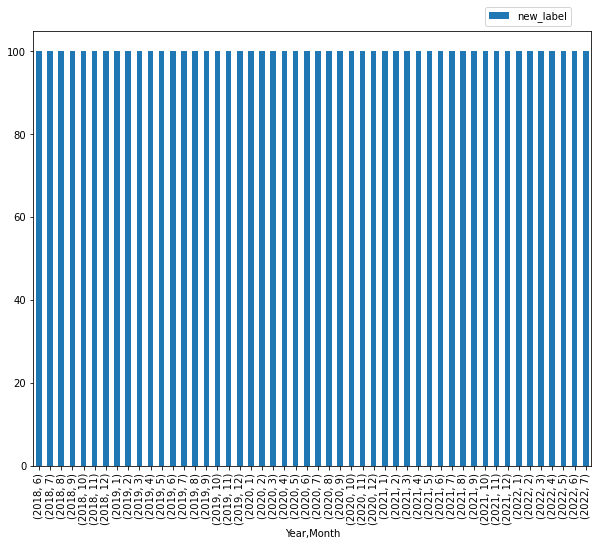

In [358]:
(a+b+c).plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50, 2) and arg 1 with shape (12,).

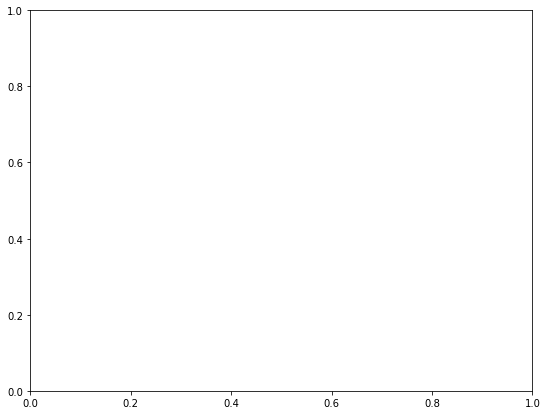

In [410]:
plt.figure(figsize=(9,7))
plt.bar(zzzz[['Year','Month']],data["Month"].unique(),a,color="green")
plt.bar(zzzz[['Year','Month']],data["Month"].unique(),b,color="yellow",bottom=np.array(c))
plt.bar(zzzz[['Year','Month']],data["Month"].unique(),c,color="red",bottom=np.array(c)+np.array(b))

plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [420]:
test = zzzz[['Year','Month']].copy()

In [421]:
year = test['Year']

In [422]:
month = test['Month']

In [424]:
rrrr = [[]]
for i in len(year):
    rrrr.append(year[i])
    rrrr.append(month[i])

TypeError: 'int' object is not iterable

In [79]:
data_2018

,comment,star,date,label,new_label,Year,Month
10602,기본 디자인이라 무난하게 잘 입을 수 잇을 것 같습니다 어디에나 잘 어울리고. 편하...,5,2018-12-31,1,1,2018,12
10633,회색 넘 이뻐요!\n사이즈도 좋습니다,5,2018-12-24,1,1,2018,12
10634,너무좋네요ㅎㅎ감사합니다,5,2018-12-11,1,1,2018,12
10637,배송도 빠르고 좋아요 굿굿굿,5,2018-12-24,1,1,2018,12
10638,아직안입어봄 좋아보여요~~,4,2018-12-29,1,1,2018,12
...,...,...,...,...,...,...,...
10831,Xyxohlgoccoh,5,2018-07-16,1,-1,2018,7
10832,K kohcupccohchooxho,5,2018-07-16,1,-1,2018,7
10833,Xogko ogcocog hogo i,5,2018-07-16,1,-1,2018,7
10834,Xypxcochohcocco k kh llh,5,2018-07-16,1,-1,2018,7


In [126]:
is_negative = data_2018['new_label'] == -1
is_positive = data_2018['new_label'] == 1
tmp1=data_2018[is_negative]
tmp2=data_2018[is_positive]

In [128]:
tmp1.groupby(['Year','Month'])['new_label'].count()

Year  Month
2018  6         1
      7        14
      8         6
      9         2
      10        8
      11        3
      12        5
Name: new_label, dtype: int64

In [129]:
tmp2.groupby(['Year','Month'])['new_label'].count()

Year  Month
2018  6        13
      7        59
      8        25
      9        22
      10       17
      11        3
      12       11
Name: new_label, dtype: int64

In [300]:
is_negative = data['new_label'] == -1
is_positive = data['new_label'] == 1
is_middle = data['new_label'] == 0
tmp1=data[is_negative]
tmp2=data[is_positive]
tmp3=data[is_middle]

In [301]:
tmp1

,comment,star,date,label,new_label,Year,Month
2,올이 다 풀려버렸습니다. 박음질 자체가 이상해요. 다른데서 구매한 건 이렇지 않았는...,1,2022-07-06,-1,-1,2022,7
15,보이즈 흰색 남색 포니 36000원대 상품이랑 \n같이 구매했었는데 카보 진그린 사...,5,2022-06-01,-1,-1,2022,6
17,상품 품질 확인은 안 하시는 것 같아요\n한 제품은 브랜드명이 박음질로 가려져 있고...,2,2022-07-02,-1,-1,2022,7
24,154 44-45키로입니다\n체구작으신분은 보이M사이즈 잘맞으실거에요,5,2022-07-15,-1,-1,2022,7
52,"162/50/상체가 마른편\n딱맞게 입는걸 좋아해서인지, 사이즈 딱이었습니다. 근데...",3,2022-07-12,-1,-1,2022,7
...,...,...,...,...,...,...,...
10830,Ucj9jdxxeepx Zji k rffdwtwbbsnfsnsnntsfmmstjt...,5,2018-07-16,1,-1,2018,7
10831,Xyxohlgoccoh,5,2018-07-16,1,-1,2018,7
10832,K kohcupccohchooxho,5,2018-07-16,1,-1,2018,7
10833,Xogko ogcocog hogo i,5,2018-07-16,1,-1,2018,7


In [302]:
data['date'] = pd.to_datetime(data['date'], format="%Y/%m")

In [303]:
data['Year'] = data['date'].dt.year 
data['Month'] = data['date'].dt.month 

In [394]:
zzzz=data.groupby(['Year', 'Month']).count().reset_index()

In [397]:
zzzz['Year'].unique()

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [400]:
zzzz['Month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [408]:
zzzz[['Year','Month']]

,Year,Month
0,2018,6
1,2018,7
2,2018,8
3,2018,9
4,2018,10
5,2018,11
6,2018,12
7,2019,1
8,2019,2
9,2019,3


In [304]:
부정=tmp1.groupby(['Year','Month'])['new_label'].count()

In [305]:
긍정=tmp2.groupby(['Year','Month'])['new_label'].count()

In [392]:
중립=tmp3.groupby(['Year','Month'])['new_label'].count()

In [336]:
중립.add(긍정, fill_value=0).add(부정, fill_value=0)

Year  Month
2018  6          15.0
      7          78.0
      8          33.0
      9          27.0
      10         25.0
      11          8.0
      12         16.0
2019  1          25.0
      2          69.0
      3         196.0
      4         153.0
      5         314.0
      6         322.0
      7         300.0
      8         236.0
      9         140.0
      10         85.0
      11         48.0
      12         27.0
2020  1          37.0
      2         103.0
      3         182.0
      4         518.0
      5        1153.0
      6         946.0
      7         692.0
      8         573.0
      9         254.0
      10        131.0
      11         33.0
      12         37.0
2021  1          52.0
      2         112.0
      3         374.0
      4         578.0
      5         684.0
      6         508.0
      7         356.0
      8         161.0
      9          45.0
      10         27.0
      11          7.0
      12         10.0
2022  1          17.0
      2          81.

In [348]:
a=(긍정/(중립.add(긍정, fill_value=0).add(부정, fill_value=0))*100).fillna(0)

In [349]:
b=(부정/(중립.add(긍정, fill_value=0).add(부정, fill_value=0))*100).fillna(0)

In [350]:
c=(중립/(중립.add(긍정, fill_value=0).add(부정, fill_value=0))*100).fillna(0)

In [338]:
a

Year  Month
2018  6         86.666667
      7         75.641026
      8         75.757576
      9         81.481481
      10        68.000000
      11        37.500000
      12        68.750000
2019  1         92.000000
      2         84.057971
      3         81.122449
      4         84.313725
      5         87.579618
      6         85.714286
      7         89.666667
      8         92.372881
      9         92.142857
      10        91.764706
      11        87.500000
      12        88.888889
2020  1         97.297297
      2         86.407767
      3         90.109890
      4         89.961390
      5         89.592368
      6         88.794926
      7         89.595376
      8         89.354276
      9         87.401575
      10        84.732824
      11        81.818182
      12        97.297297
2021  1         84.615385
      2         87.500000
      3         85.561497
      4         89.273356
      5         89.035088
      6         87.795276
      7         89.606742


In [341]:
b

Year  Month
2018  6         6.666667
      7        17.948718
      8        18.181818
      9         7.407407
      10       32.000000
      11       37.500000
      12       31.250000
2019  1         8.000000
      2        13.043478
      3        14.285714
      4        11.111111
      5        10.828025
      6        11.180124
      7         8.333333
      8         3.389831
      9         6.428571
      10        8.235294
      11       12.500000
      12       11.111111
2020  1         2.702703
      2        13.592233
      3         6.593407
      4         7.335907
      5         7.805724
      6         8.245243
      7         8.815029
      8         9.249564
      9         8.267717
      10       11.450382
      11       18.181818
      12        2.702703
2021  1        13.461538
      2         9.821429
      3        11.229947
      4         6.228374
      5         8.187135
      6         9.251969
      7         9.831461
      8         9.937888
      9      

In [346]:
c

Year  Month
2018  6         6.666667
      7         6.410256
      8         6.060606
      9        11.111111
      10        0.000000
      11       25.000000
      12        0.000000
2019  1         0.000000
      2         2.898551
      3         4.591837
      4         4.575163
      5         1.592357
      6         3.105590
      7         2.000000
      8         4.237288
      9         1.428571
      10        0.000000
      11        0.000000
      12        0.000000
2020  1         0.000000
      2         0.000000
      3         3.296703
      4         2.702703
      5         2.601908
      6         2.959831
      7         1.589595
      8         1.396161
      9         4.330709
      10        3.816794
      11        0.000000
      12        0.000000
2021  1         1.923077
      2         2.678571
      3         3.208556
      4         4.498270
      5         2.777778
      6         2.952756
      7         0.561798
      8         3.726708
      9      

In [351]:
a+b+c

Year  Month
2018  6        100.0
      7        100.0
      8        100.0
      9        100.0
      10       100.0
      11       100.0
      12       100.0
2019  1        100.0
      2        100.0
      3        100.0
      4        100.0
      5        100.0
      6        100.0
      7        100.0
      8        100.0
      9        100.0
      10       100.0
      11       100.0
      12       100.0
2020  1        100.0
      2        100.0
      3        100.0
      4        100.0
      5        100.0
      6        100.0
      7        100.0
      8        100.0
      9        100.0
      10       100.0
      11       100.0
      12       100.0
2021  1        100.0
      2        100.0
      3        100.0
      4        100.0
      5        100.0
      6        100.0
      7        100.0
      8        100.0
      9        100.0
      10       100.0
      11       100.0
      12       100.0
2022  1        100.0
      2        100.0
      3        100.0
      4        100.0
 